In [4]:
import pandas as pd
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df=pd.read_csv('tracks_cleaned.csv',index_col='track_id')

In [6]:
df.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,year_released,album,album_id,artist_id,artist,genres_all_id,track,duration,genre_top,genres_all
track_id,,,,,,,,,,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,2009,AWOL - A Way Of Life,1,1,AWOL,[21],Food,168,Hip-Hop,['Hip-Hop']
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,2009,AWOL - A Way Of Life,1,1,AWOL,[21],Electric Ave,237,Hip-Hop,['Hip-Hop']
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,2009,AWOL - A Way Of Life,1,1,AWOL,[21],This World,206,Hip-Hop,['Hip-Hop']
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008,Constant Hitmaker,6,6,Kurt Vile,[10],Freeway,161,Pop,['Pop']
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,2009,AWOL - A Way Of Life,1,1,AWOL,[21],Street Music,207,Hip-Hop,['Hip-Hop']


In [7]:
#Normalising temp0
min_tempo=np.min(df.tempo)
max_tempo=np.max(df.tempo)


In [8]:
df['tempo']=(df.tempo-min_tempo)/(max_tempo-min_tempo)

In [9]:
audio_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']


In [10]:
audio_features = df[audio_cols]
audio_features.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,0.642706,0.576661
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,0.479206,0.269240
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,0.367184,0.621661
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,0.414608,0.963590
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,0.426055,0.894072


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023BD8685F98>,
      dtype=object)

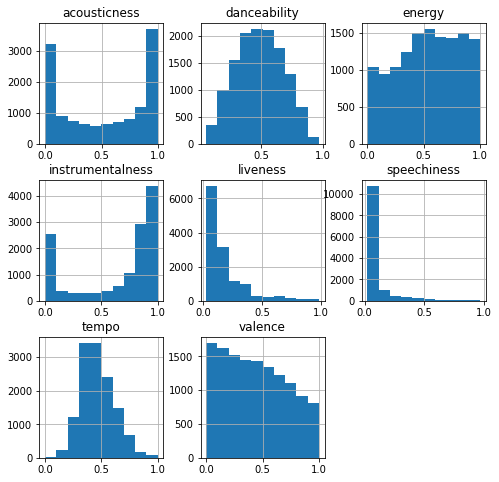

In [11]:
#visualising normalised audio features
audio_features.hist(figsize=(8,8))

In [12]:
#calculating correlation based on audio features
co_rel=audio_features.corr()
co_rel

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
acousticness,1.000000,-0.189599,-0.477273,0.110033,0.041319,0.038785,-0.110701,-0.085436
danceability,-0.189599,1.000000,0.045345,-0.118033,-0.143339,0.171311,-0.094352,0.428515
energy,-0.477273,0.045345,1.000000,-0.002412,0.045752,-0.008645,0.227324,0.219384
instrumentalness,0.110033,-0.118033,-0.002412,1.000000,-0.058593,-0.216689,0.023003,-0.145200
liveness,0.041319,-0.143339,0.045752,-0.058593,1.000000,0.073104,-0.007566,-0.017886
speechiness,0.038785,0.171311,-0.008645,-0.216689,0.073104,1.000000,0.032188,0.094794
tempo,-0.110701,-0.094352,0.227324,0.023003,-0.007566,0.032188,1.000000,0.129911
valence,-0.085436,0.428515,0.219384,-0.145200,-0.017886,0.094794,0.129911,1.000000


<Figure size 432x288 with 0 Axes>

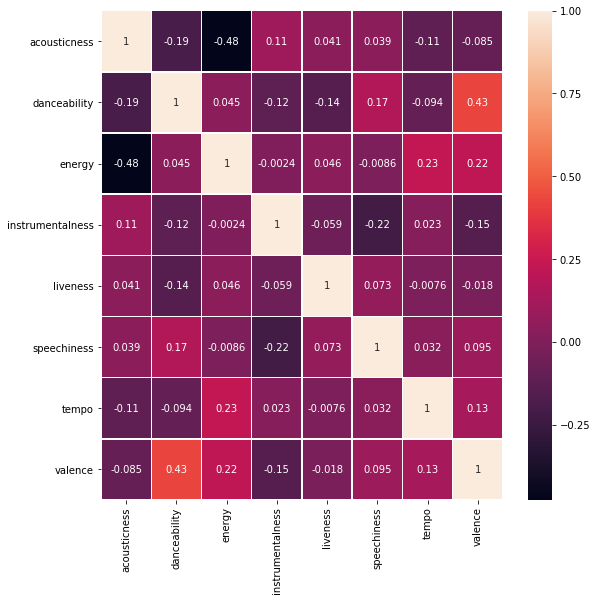

In [13]:
#visualising correlation through heatmap
fig = plt.figure()
fig, ax = plt.subplots(1,1,figsize=(9,9))
sns.heatmap(co_rel, xticklabels=co_rel.columns.values, yticklabels=co_rel.columns.values, annot=True, linewidth=0.5)  

In [14]:
abs(co_rel)>0.3

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
acousticness,True,False,True,False,False,False,False,False
danceability,False,True,False,False,False,False,False,True
energy,True,False,True,False,False,False,False,False
instrumentalness,False,False,False,True,False,False,False,False
liveness,False,False,False,False,True,False,False,False
speechiness,False,False,False,False,False,True,False,False
tempo,False,False,False,False,False,False,True,False
valence,False,True,False,False,False,False,False,True


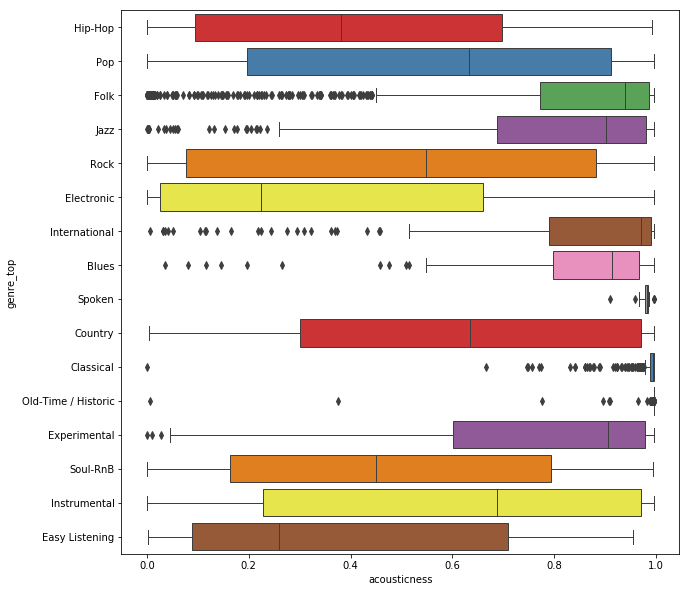

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(x='acousticness', y='genre_top', data=df, palette='Set1',linewidth=1)

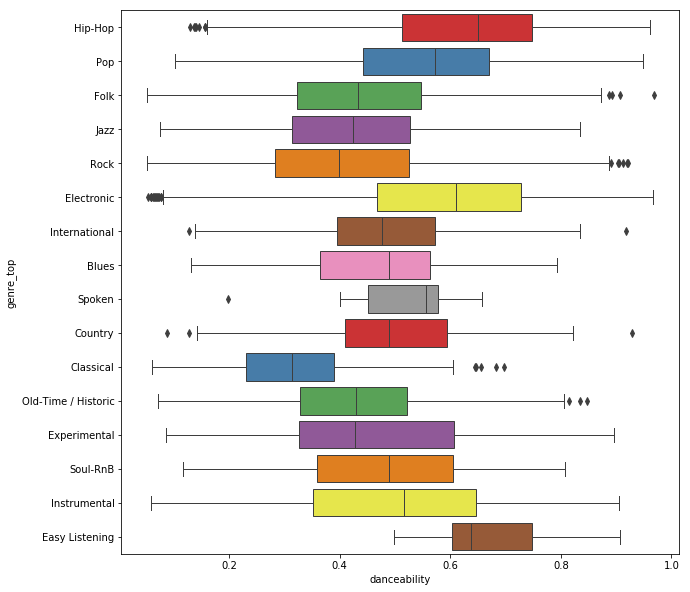

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(x='danceability', y='genre_top', data=df, palette='Set1',linewidth=1)

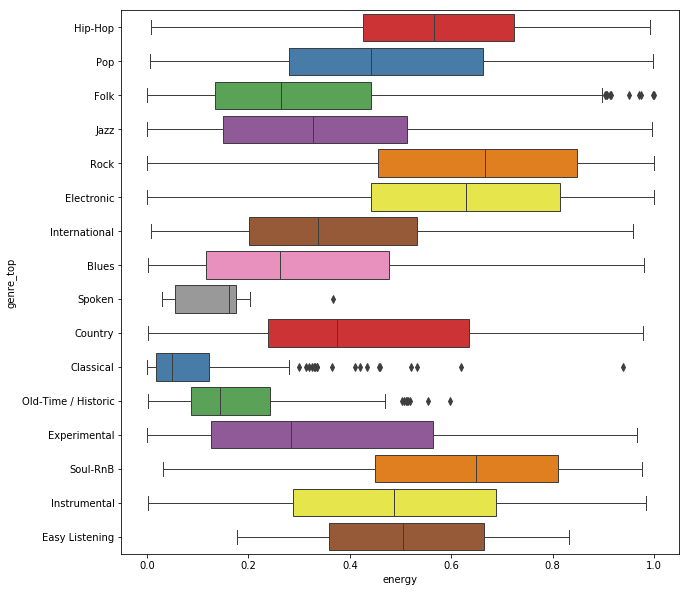

In [17]:
plt.figure(figsize=(10,10))
sns.boxplot(x='energy', y='genre_top', data=df, palette='Set1',linewidth=1)

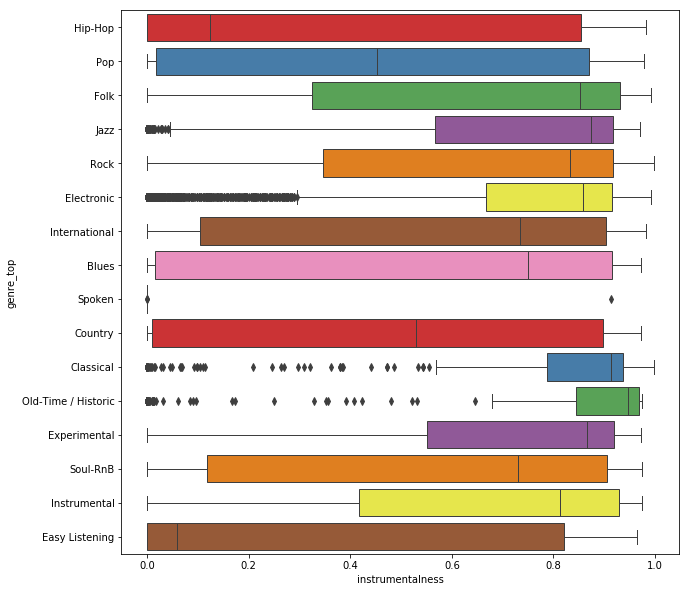

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(x='instrumentalness', y='genre_top', data=df, palette='Set1',linewidth=1)

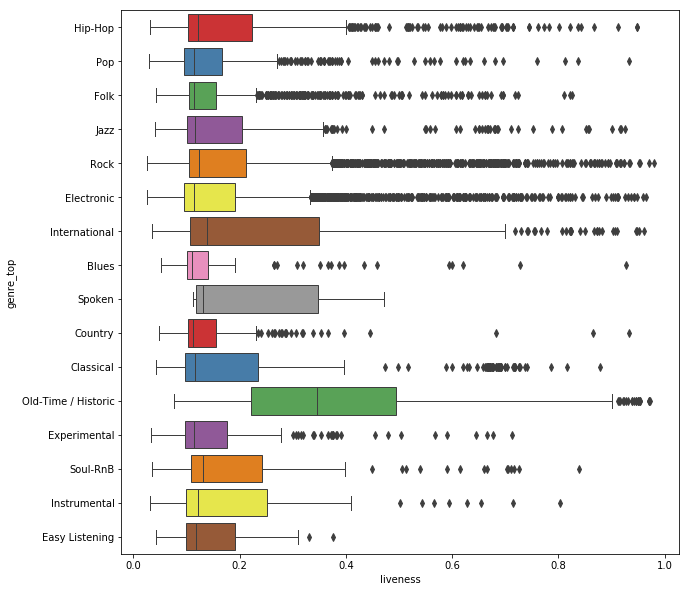

In [19]:
plt.figure(figsize=(10,10))
sns.boxplot(x='liveness', y='genre_top', data=df, palette='Set1',linewidth=1)

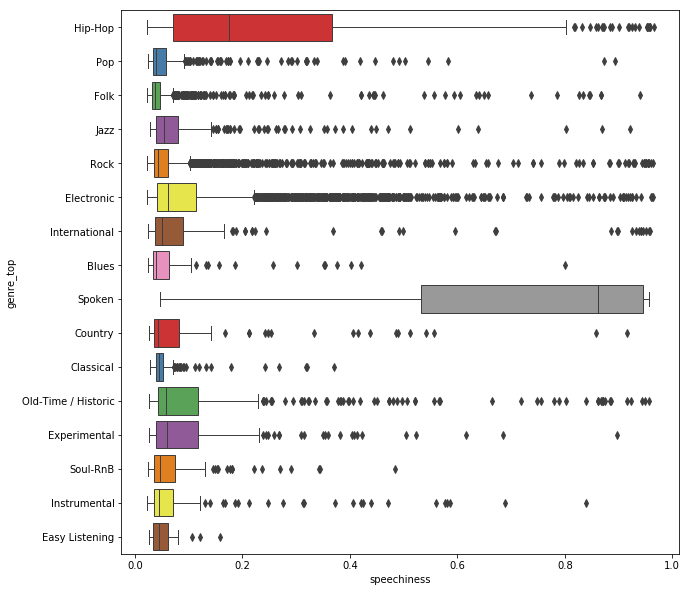

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(x='speechiness', y='genre_top', data=df, palette='Set1',linewidth=1)

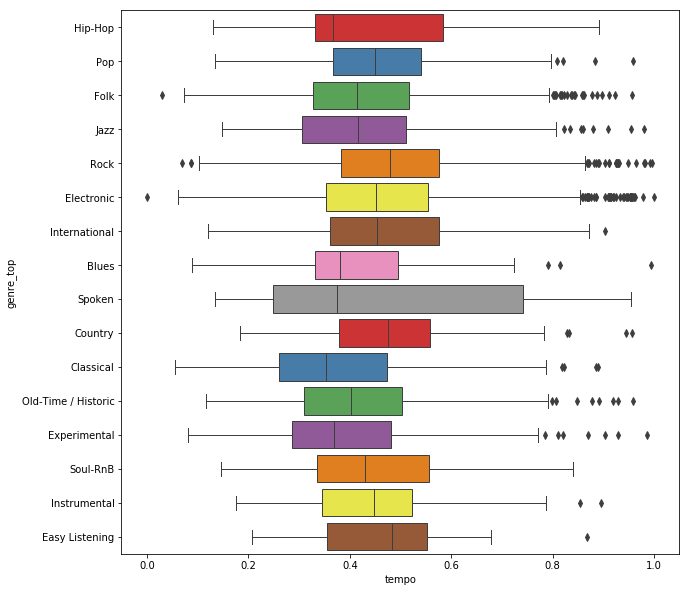

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(x='tempo', y='genre_top', data=df, palette='Set1',linewidth=1)